In [50]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
import warnings
warnings.filterwarnings('ignore')

# Data reading

In [52]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Understanding

In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Categorical variables

### Binary Categorical variables

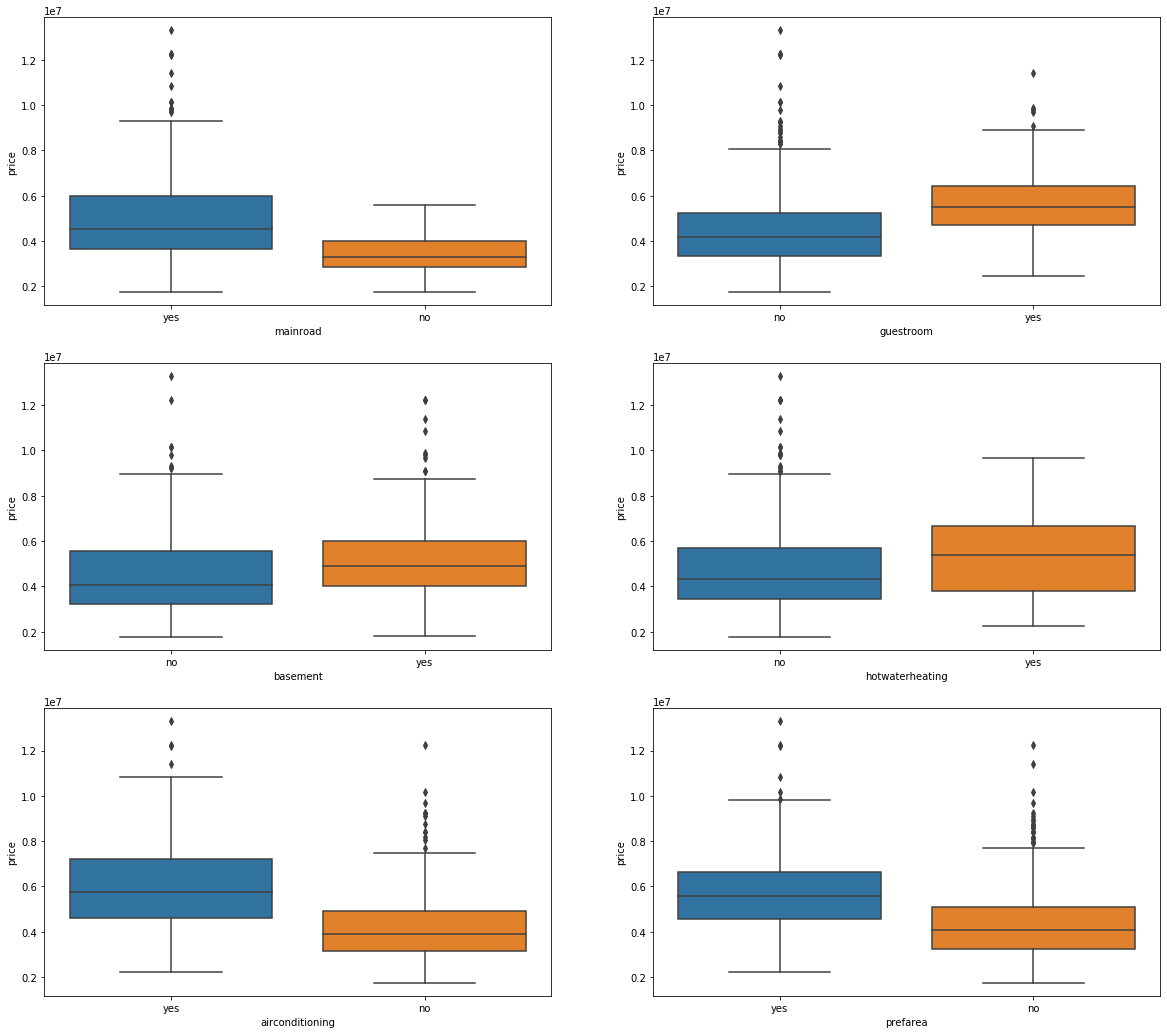

In [7]:
## Use box plots for categorical variables
plt.figure(figsize=(20,18))
plt.subplot(3,2,1)
sns.boxplot(x='mainroad', y='price', data=df)
plt.subplot(3,2,2)
sns.boxplot(x='guestroom', y='price', data=df)
plt.subplot(3,2,3)
sns.boxplot(x='basement', y='price', data=df)
plt.subplot(3,2,4)
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.subplot(3,2,5)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.subplot(3,2,6)
sns.boxplot(x='prefarea', y='price', data=df)
plt.show()

Observe the median values of price increasing/decreasing for different conditions like bathroom, basement, etc

### Multi-valued Categorical variables

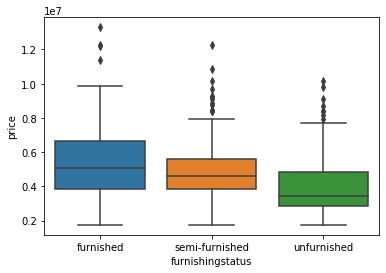

In [8]:
sns.boxplot(x = 'furnishingstatus', y='price', data=df)
plt.show()

### Bivariate Analysis

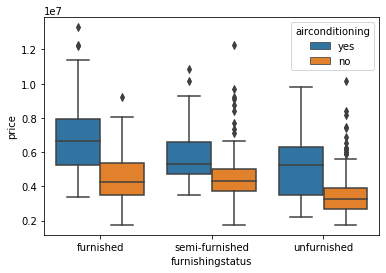

In [9]:
sns.boxplot(x = 'furnishingstatus', y='price', hue='airconditioning', data=df)
plt.show()

## Numeric Variables

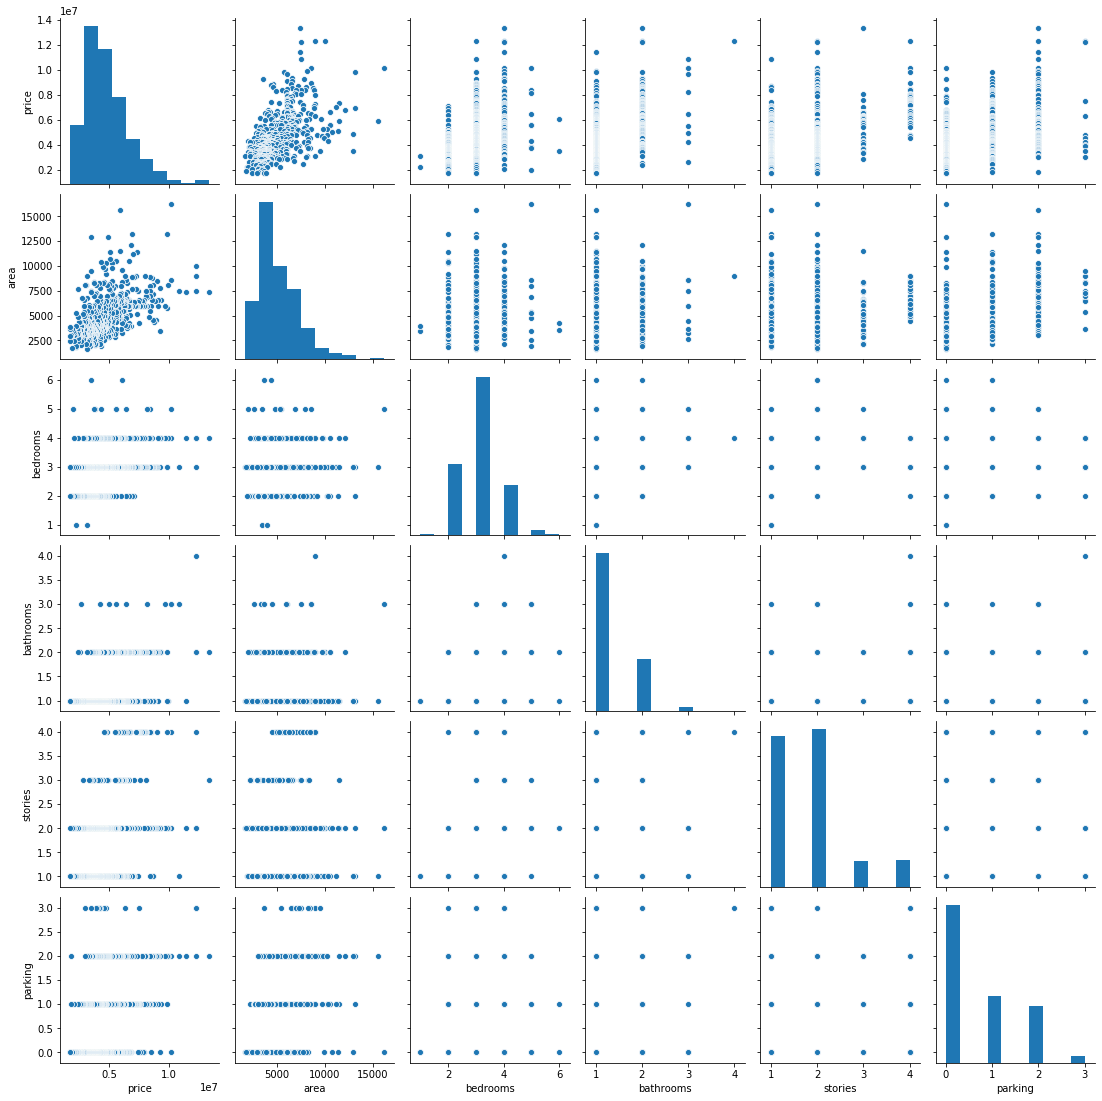

In [10]:
sns.pairplot(df)
plt.show()

# Data Preprocessing

## Categorical variables

Dealing with binary categorical variables

In [11]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [53]:
df['guestroom'] = df.guestroom.apply(lambda x: 1 if x == 'yes' else 0)
varlist = ['mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Dealing with Multi-values categorical variables

In [54]:
status = pd.get_dummies(df.furnishingstatus, drop_first=True)
df_clean = pd.concat([df, status], axis=1)
df_clean = df_clean.drop('furnishingstatus', axis=1)
df_clean.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Train/Test Split

In [55]:
df_train, df_test = train_test_split(df_clean, train_size=0.7, random_state=100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


## MinMax scaling for numeric variables

- Scaling must be always done after Train-Test split
- Scaling is a must in Multi-variate Linear Regression since interpretation will be difficult if each predictor is in different range of values (the coeeficient weights will be misleading in this case in depicting the importance of predicting due to different scales of predictor)
- Scaling is very important in case of optimization algorithms like gradient descent for convergence
- Standardisation is better in many cases since it does not remove the outlier info

Extract Numeric variables and do MinMax scaling

In [56]:
var_list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = MinMaxScaler()
df_train[var_list] = scaler.fit_transform(df_train[var_list])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [16]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build a Model with RFE 

## This approach will be combination of automated (RFE based coarse tuning) and manual method (Stats based fine tuning)

- RFE is available in sklearn package hence model must be built with sklearn
- sklearn does not give stats info like statsmodels
- Build a coarse model with RFE which is an automated approach
- Then do finetuning of this model with manual approach by using statsmodels

In [57]:
y_train = df_train.pop('price')
X_train = df_train

In [58]:
lm = LinearRegression()

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

## Take columns where rfe is True

In [60]:
cols = X_train.columns[rfe.support_]

In [61]:
X_train_rfe = X_train[cols]

## Use statsmodels to build the model with columns from RFE

In [62]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.28e-82
Time:                        13:02:49   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bedrooms have higher p-value so lets drop it

In [31]:
X_train_new_sm = X_train_sm.drop('bedrooms', axis=1)
lm = sm.OLS(y_train, X_train_new_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           6.67e-83
Time:                        00:18:19   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Calculate VIF value for the model to confirm

In [32]:
vif = pd.DataFrame()
X_train_new_rfe = X_train_rfe.drop('bedrooms', axis=1)
vif['Features'] = X_train_new_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_rfe.values, i) for i in range(X_train_new_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


# Residual Analysis

The residual error must be approximately normal with mean zero

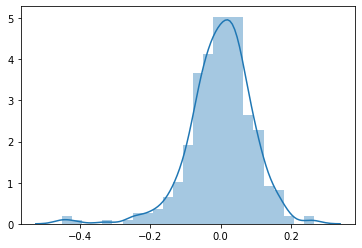

In [34]:
y_train_pred = lm.predict(X_train_new_sm)
res = y_train_pred - y_train
sns.distplot(res)
plt.show()

# Predictions on Test set

- While dealing with test data we perform only transform based on scaler we get from train data and not fit or fit_transform
- the implications of only transform can be seen in describe() of test data where values are not in 0-1 range after scaling
- extract x and y variables for test
- Remove all the variables which were dropped from training side input due to pvalue/VIF
- add constant for intercept if statsmodels is used for fitting
- Perform only predictions based on the model we got from training data

In [35]:
test_data = df_test.copy()

In [36]:
var_list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
test_data[var_list] = scaler.transform(test_data[var_list])

In [37]:
test_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### extract x and y for test predictions

In [38]:
y_test = test_data.pop('price')

In [43]:
X_test = test_data[test_data.columns[rfe.support_]]

In [46]:
X_test = X_test.drop('bedrooms', axis=1)

In [47]:
X_test_sm = sm.add_constant(X_test)

In [48]:
y_test_pred = lm.predict(X_test_sm)

### Find the metric R2 for test set

In [49]:
r2_score(y_test, y_test_pred)

0.6481740917926483